In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

Text(0, 0.5, 'mean smoothness')

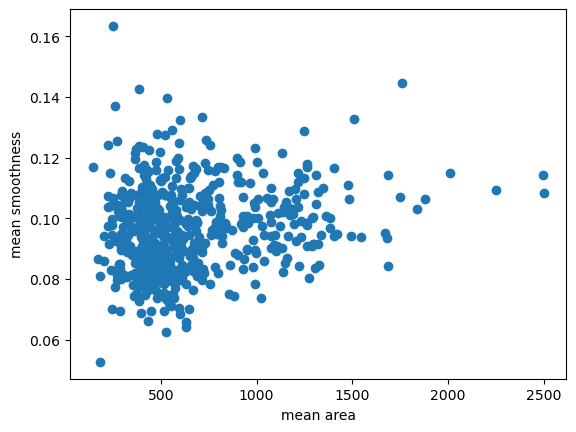

In [6]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

Text(0, 0.5, 'mean smoothness')

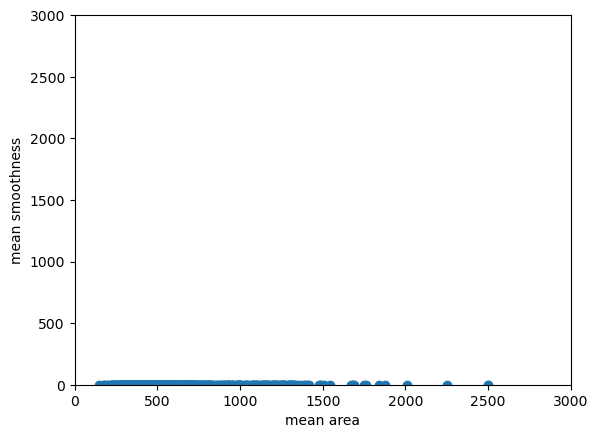

In [7]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [8]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train_scale = scaler.transform(X_train)

In [12]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

(array([-8.97694617e-16, -3.35165351e-15,  3.23355506e-15, -2.22727819e-15,
        -1.46512838e-15,  5.31740403e-16,  6.61497719e-16,  4.76053873e-16,
        -5.68678194e-15,  6.94804409e-16,  4.90450171e-17,  5.76827963e-16,
         8.10706813e-16,  1.82881793e-16,  1.79160716e-15,  4.15540618e-16,
         3.25502751e-16,  6.02265490e-16, -1.51771148e-16,  1.34580991e-15,
        -4.28960896e-16,  4.92402212e-16, -1.51795548e-15,  1.32494748e-16,
         5.92337534e-15, -4.70369317e-16, -1.36923440e-15,  2.56327316e-16,
        -2.12333204e-15,  1.99242332e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [13]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([1.41124989e+01, 1.91528791e+01, 9.18182857e+01, 6.53819121e+02,
        9.64133407e-02, 1.03318659e-01, 8.74845356e-02, 4.86900264e-02,
        1.80939121e-01, 6.26680220e-02, 4.02523516e-01, 1.20988066e+00,
        2.82524681e+00, 4.02856176e+01, 7.00339341e-03, 2.50632286e-02,
        3.14727859e-02, 1.16463495e-02, 2.05252703e-02, 3.71029516e-03,
        1.62560967e+01, 2.55387473e+01, 1.07031407e+02, 8.81189890e+02,
        1.32459231e-01, 2.51861846e-01, 2.67491334e-01, 1.14447673e-01,
        2.90416044e-01, 8.34914286e-02]),
 array([3.53148742e+00, 4.15439017e+00, 2.42862794e+01, 3.57772373e+02,
        1.37841928e-02, 5.04344575e-02, 7.77159693e-02, 3.85550295e-02,
        2.73677762e-02, 6.81132951e-03, 2.84057900e-01, 5.41365325e-01,
        2.03551332e+00, 4.76779413e+01, 2.84053720e-03, 1.74905171e-02,
        3.10715741e-02, 5.89071328e-03, 8.18748246e-03, 2.60681955e-03,
        4.88517629e+00, 6.09392372e+00, 3.38319477e+01, 5.85750909e+02,
        2.26008843e-02

In [14]:
X_test_scale = scaler.transform(X_test)

In [15]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0)

(array([ 0.02090746,  0.16431947,  0.03098112,  0.01492717, -0.01921272,
         0.10117401,  0.0844404 ,  0.02966118,  0.04062282,  0.09495981,
         0.04653793,  0.06428685,  0.10007503,  0.00538732,  0.06604308,
         0.11840198,  0.06761678,  0.12691574,  0.01038083,  0.16199868,
         0.01337734,  0.11341872,  0.03390329, -0.00517026, -0.02001641,
         0.07842833,  0.11756483,  0.01212835, -0.02700757,  0.12745382]),
 array([0.98484055, 1.15221352, 0.99783441, 0.91061412, 1.09332501,
        1.20997119, 1.11614317, 1.02702513, 1.0034221 , 1.16404942,
        0.86929934, 1.0858183 , 0.95738032, 0.73797558, 1.25386932,
        1.10490478, 0.84120579, 1.20933979, 1.04289005, 1.05896921,
        0.94112182, 1.03290198, 0.96071254, 0.84629366, 1.04571542,
        1.12996138, 1.20450506, 1.03208579, 0.90829415, 1.06246714]))

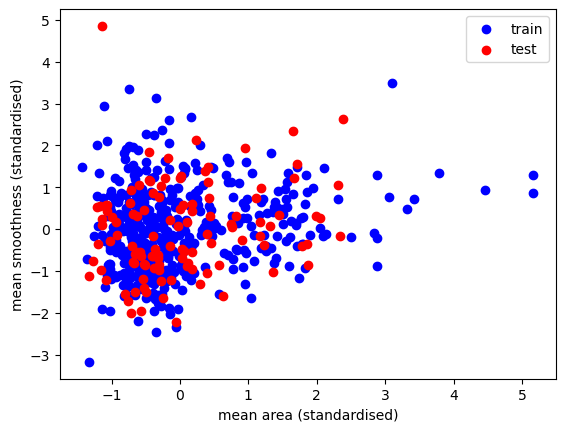

In [16]:
plt.scatter(X_train_scale[:, 3], 
            X_train_scale[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_scale[:, 3],  
            X_test_scale[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (standardised)")
plt.ylabel(data.feature_names[4] + " (standardised)")
plt.legend(loc="best");

In [17]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')

In [18]:
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.9649122807017544


In [26]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.956140350877193


range scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1,1])

In [34]:
mmscaler.fit(X_train)
X_train_mms = mmscaler.transform(X_train)
X_test_mms  = mmscaler.transform(X_test)

InvalidParameterError: The 'feature_range' parameter of MinMaxScaler must be an instance of 'tuple'. Got [-1, 1] instead.

In [29]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

NameError: name 'X_train_mms' is not defined

In [30]:
X_train.max(axis=0), X_train.min(axis=0)

(array([2.811e+01, 3.381e+01, 1.885e+02, 2.501e+03, 1.447e-01, 3.114e-01,
        4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
        2.198e+01, 5.422e+02, 2.333e-02, 1.354e-01, 3.960e-01, 5.279e-02,
        6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
        2.226e-01, 1.058e+00, 1.252e+00, 2.903e-01, 6.638e-01, 2.075e-01]),
 array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
        0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
        7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
        7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
        7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02]))

In [31]:
plt.scatter(X_train_mms[:, 3], 
            X_train_mms[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_mms[:, 3],  
            X_test_mms[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (scaled)")
plt.ylabel(data.feature_names[4] + " (scaled)")
plt.legend(loc="best");

NameError: name 'X_train_mms' is not defined

In [32]:
clf.fit(X_train_mms, y_train)
print(clf.score(X_test_mms, y_test))

NameError: name 'X_train_mms' is not defined

Normalization

In [35]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [36]:
# normalizer.fit(X_train)

In [37]:
X_train_norm = normalizer.transform(X_train)
X_test_norm  = normalizer.transform(X_test)

In [38]:
np.linalg.norm(X_train, axis=1)[:20]

array([ 504.90301766,  618.934165  , 1250.79346781,  680.57848004,
        789.01630477,  836.86533919,  694.54924712,  765.38441537,
        988.35346236,  624.18559733, 2090.96095333,  679.47567586,
       1094.37796043,  609.98361938,  490.99404722,  558.47604006,
       1758.43151043,  550.59180245,  843.30139448,  841.67151693])

In [39]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [40]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.7192982456140351


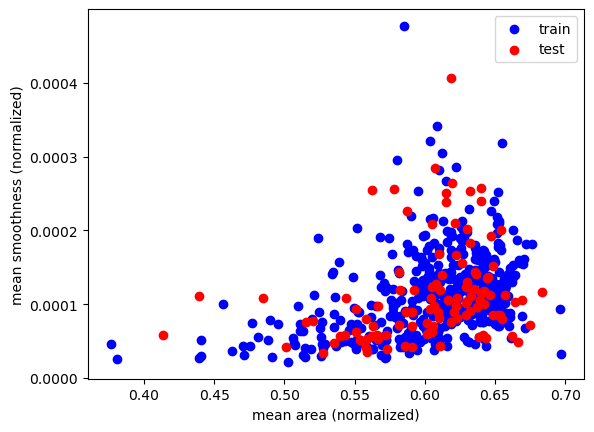

In [41]:
plt.scatter(X_train_norm[:, 3], 
            X_train_norm[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_norm[:, 3], 
            X_test_norm[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (normalized)")
plt.ylabel(data.feature_names[4] + " (normalized)")
plt.legend(loc="best");

In [42]:
for norm in ['l2', 'l1', 'max']:
    normalizer = Normalizer(norm=norm)
    normalizer.fit(X_train)
    X_train_norm = normalizer.transform(X_train)
    X_test_norm  = normalizer.transform(X_test)
    clf.fit(X_train_norm, y_train)
    print(norm, clf.score(X_test_norm, y_test))

l2 0.7192982456140351
l1 0.6052631578947368
max 0.8157894736842105


PCA Whitening

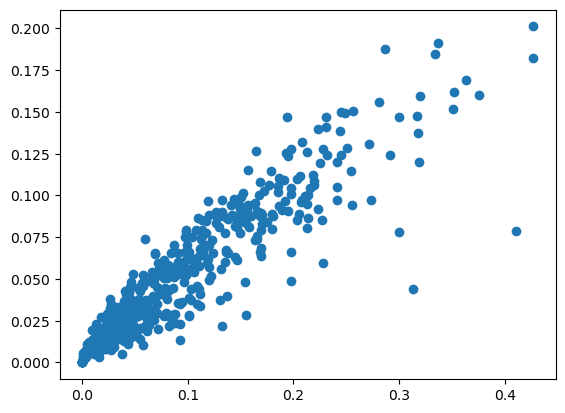

In [43]:
plt.scatter(data.data[:, 6], data.data[:, 7])

(0.0, 0.5)

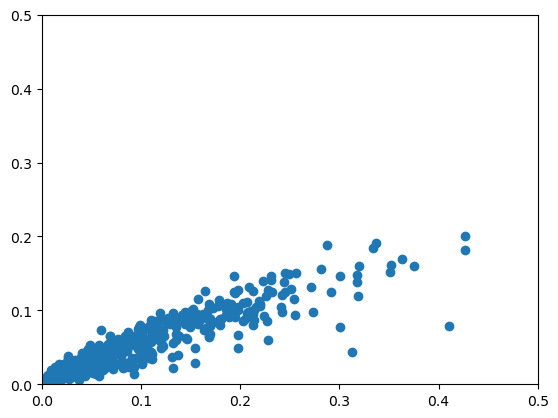

In [44]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

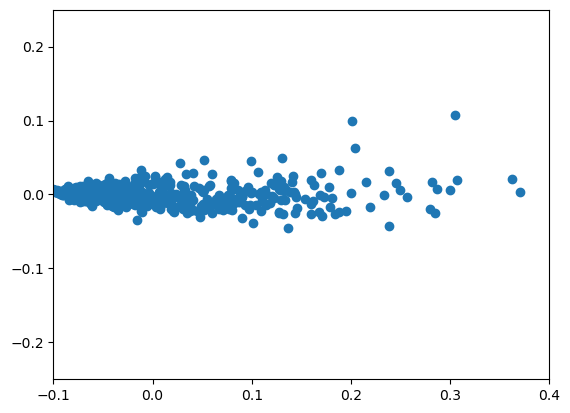

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [46]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([1.14631991e-18, 3.03500390e-18]), array([0.08751603, 0.01371268]))

(-4.0, 10.0)

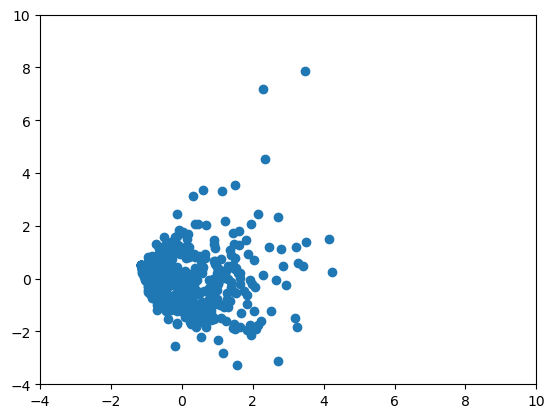

In [47]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

In [48]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([1.05363872e-17, 2.18532476e-16]), array([0.99912088, 0.99912088]))

ZCA Whitening

(-3.0, 3.0)

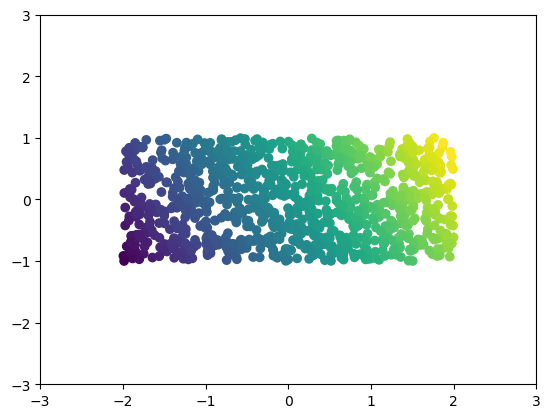

In [50]:
X = np.random.uniform(low=-1, high=1, size=(1000,2)) * (2,1)
y = 2 * X[:,0] + X[:,1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [51]:
angle = np.pi/4

In [52]:
R = np.array([[np.sin(angle), -np.cos(angle)],
              [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3.0, 3.0)

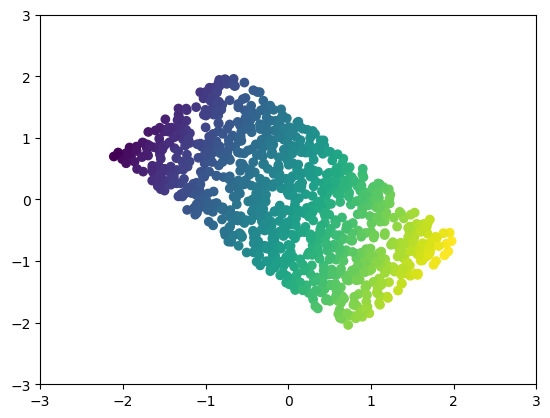

In [53]:
X_rot = X.dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [54]:
X = X_rot

Text(0.5, 1.0, 'PCA')

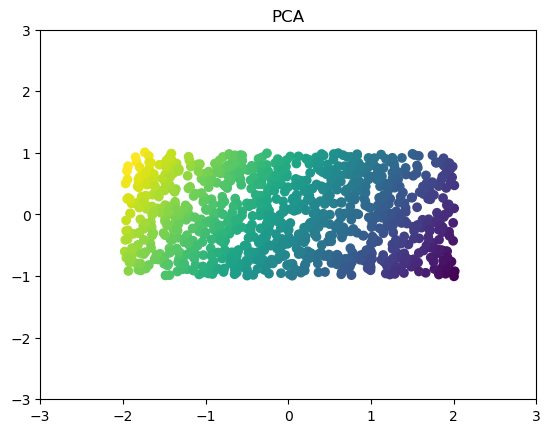

In [55]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA")

Text(0.5, 1.0, 'PCA Whitening')

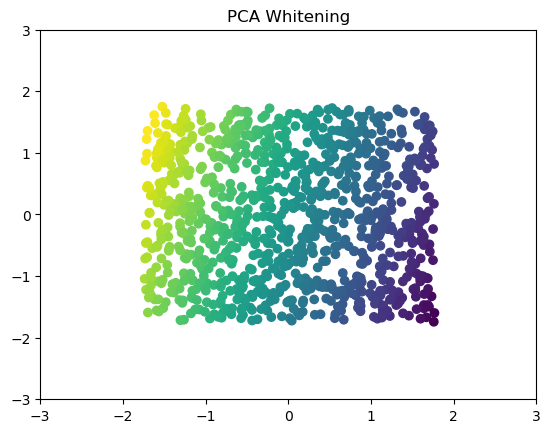

In [56]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA Whitening")

Text(0.5, 1.0, 'ZCA Whitening')

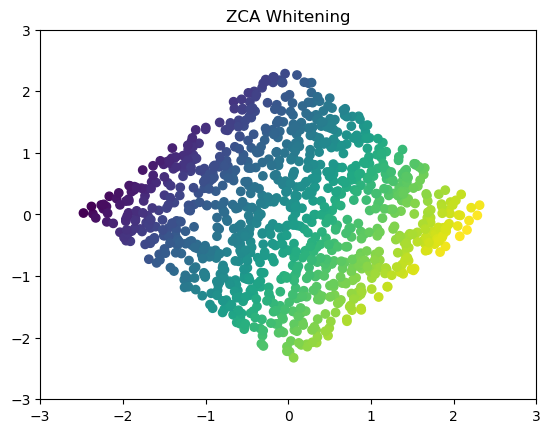

In [57]:
X_new2 = X_new.dot(pca.components_)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("ZCA Whitening")

In [58]:
pca.components_

array([[-0.70424502,  0.70995701],
       [ 0.70995701,  0.70424502]])